In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["mathtext.fontset"] = "dejavuserif"
plt.rcParams["font.family"] = "serif"
plt.rcParams["font.size"] = 11

In [2]:
# set up results directory
results_dir = "/scratch/alpine/jafa3629/constriction/constriction_good_copy"

In [16]:
# peak at files in the results directory
display(os.listdir(results_dir))

['n1=3.0000-eta=0.0010-gamma=3.0000.npz',
 'n1=3.0000-eta=0.0075-gamma=3.0000.npz',
 'n1=3.0000-eta=0.0001-gamma=3.0000.npz',
 'n1=3.0000-eta=0.0100-gamma=3.0000.npz',
 'n1=3.0000-eta=0.0050-gamma=3.0000.npz']

In [17]:
# choose a fname
fname = 'n1=3.0000-eta=0.0050-gamma=3.0000.npz'

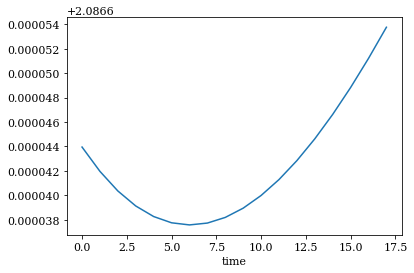

In [18]:
# load data
data = np.load(f"{results_dir}/{fname}")

# set configs
x, y = data['x'],data['y']
NX, NY = len(x),len(y)

# check if it looks to be approaching a steady state
plt.plot(data['q'][5:,1,NX//2,NY//2])
plt.xlabel("time")
plt.show()

# and extract the steady state values of n, jx, jy
q = data['q'][-1,:,:,:]
n = q[0,:,:]
jx,jy = q[1,:,:],q[2,:,:]


In [19]:
# constiction shape
Y,X = np.meshgrid(y,x)
mask = np.zeros_like(X)
mask[Y < (0.342-0.094)/2 * np.exp(-(X-1/2)**2*100)] = 1
mask[:,NY//2:] = np.flip(mask[:,:NY//2],1)
width = 0.342 - 2*(0.342-0.094)/2 * np.exp(-(x-1/2)**2*100)

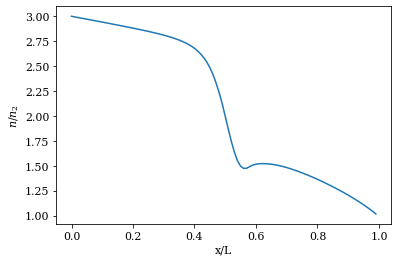

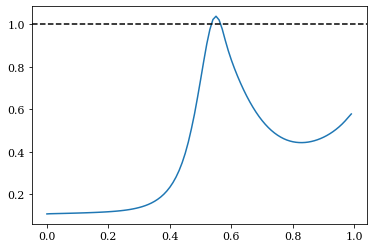

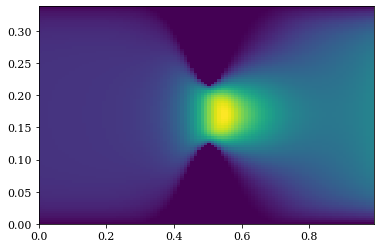

In [20]:
# plot the density profile down the middle of the channel
plt.plot(x,n[:,NY//2])
plt.xlabel("x/L")
plt.ylabel("$n/n_2$")
plt.show()

# compute the local mach number
ux,uy = jx/n, jy/n
vs = np.sqrt(n)
M = np.sqrt(ux**2+uy**2)/vs

# plot the local mach number
plt.plot(x,M[:,NY//2])
plt.axhline(y=1, color="black", linestyle="--")
plt.show()

# plot the velocity field as a heatmap
plt.pcolormesh(x,y,np.sqrt(ux.T**2+uy.T**2))

NameError: name 'width' is not defined

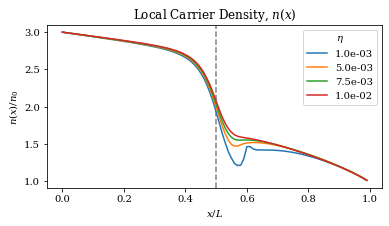

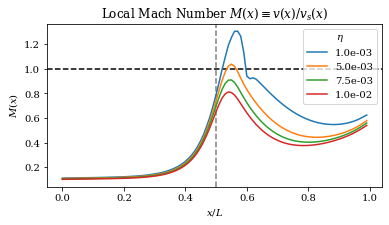

<Figure size 432x144 with 0 Axes>

In [4]:
# plot density for varying viscosities eta
plt.figure(1, figsize=(6,3))
plt.figure(2, figsize=(6,3))
plt.axhline(y=1, color="black", linestyle="--")
for fn in sorted(os.listdir(results_dir)):
    eta = float(fn.split("eta=")[1].split("-")[0])
    if eta != 0.0001:
        data = np.load(f"{results_dir}/{fn}")
        x, y = data['x'],data['y']
        NX, NY = len(x),len(y)
        q = data['q'][-1,:,:,:]
        n = q[0,:,:]
        jx,jy = q[1,:,:],q[2,:,:]
        
        plt.figure(1)
        plt.plot(x, n[:,NY//2], label=f"{eta:.1e}")

        plt.figure(2)
        ux,uy = jx/n, jy/n
        vs = np.sqrt(n)
        M = np.sqrt(ux**2+uy**2)/vs 
        plt.plot(x, M[:,NY//2], label=f"{eta:.1e}")



plt.figure(1)
plt.legend(title="$\eta$")
plt.axvline(x=0.5,color="grey",linestyle="--",zorder=0)
plt.title("Local Carrier Density, $n(x)$")
plt.xlabel("$x/L$")
plt.ylabel("$n(x)/n_0$")


plt.figure(2)
plt.title(r"Local Mach Number $M(x) \equiv v(x) / v_s(x)$")
plt.ylabel(r"$M(x)$")
plt.xlabel("$x/L$")
plt.legend(title="$\eta$")
plt.axvline(x=0.5,color="grey",linestyle="--",zorder=0)

plt.figure(3, figsize=(6,2))
plt.plot(x, width, color = "black")
plt.ylabel("w(x)/L")
plt.xlabel("$x/L$")
plt.axvline(x=0.5,color="grey",linestyle="--",zorder=0)
plt.title("Local Channel Width, $w(x)$")






    

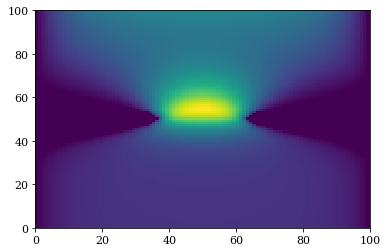

In [22]:
plt.figure(figsize = (6,4))
plt.pcolormesh(ux)

